In [ ]:
# 코랩사용시 구글드라이브 연동
# from google.colab import drive
# drive.mount('./mydrive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [10]:
import tensorflow as tf
from tensorflow.keras import utils

import os 
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

import PIL
import PIL.Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import metrics, optimizers, initializers, regularizers

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,                    # 이미지 살리기 
                                  horizontal_flip=True,         # 전치가능
                                  width_shift_range=0.1,        # 가로 이동
                                  height_shift_range=0.1,       # 세로 이동?
                                  rotation_range=5,          # 5도씩 돌리는
                                  shear_range=0.7,           # 0.7 각도 내에서 돌리기
                                  zoom_range=[0.9,2],         # 이미지 확대하거나 축소하거나
                                  vertical_flip=True,      
                                  fill_mode='nearest')           # 가장 가까운 색으로 채우기

In [21]:
train_generator = train_datagen.flow_from_directory('./deep_data/brainimages/train',
                                 target_size=(150,150),
                                 batch_size=5,
                                 class_mode='binary')

Found 160 images belonging to 2 classes.


In [44]:
train_generator

In [22]:
# 테스트 데이터는 원본 그대로
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
test_generator = test_datagen.flow_from_directory('./deep_data/brainimages/test',
                                target_size=(150,150),
                                batch_size=5,
                                class_mode='binary')

Found 120 images belonging to 2 classes.


In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))    # 클래스라벨이 2개라서 => multi
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
# y(label) : binary
# abnomal, normal : 0.1

# y : one_hot
# normal : [1,0]
# abnormal : [0,1]

# y(label) : 0,1,2,3, .... => loss함수를 sparse_categorical_crossentropy
# y가 label이 많으면 onehot을 안하고도 loss를 바꿔서 쓰면됨

In [20]:
adam = optimizers.Adam(learning_rate=0.0002)         # ???  러닝레이트가 뭐길래
model.compile(loss='sparse_categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

In [32]:
hist = model.fit(train_generator, 
#                steps_per_epoch=100, # 랜덤하게 변형시키는데 백번을 변형시켜서 가져옴?  요거 이상하대
                 epochs=50, 
                 validation_data=test_generator,
                 validation_steps=20)

Epoch 1/50
32/32 [==============================] - 1s 32ms/step - loss: 0.2272 - accuracy: 0.9000 - val_loss: 0.4906 - val_accuracy: 0.7900
Epoch 2/50
32/32 [==============================] - 1s 28ms/step - loss: 0.2765 - accuracy: 0.8938 - val_loss: 0.3937 - val_accuracy: 0.8400
Epoch 3/50
32/32 [==============================] - 1s 29ms/step - loss: 0.2835 - accuracy: 0.9062 - val_loss: 0.3398 - val_accuracy: 0.8200
Epoch 4/50
32/32 [==============================] - 1s 28ms/step - loss: 0.2260 - accuracy: 0.9062 - val_loss: 0.3240 - val_accuracy: 0.8300
Epoch 5/50
32/32 [==============================] - 1s 28ms/step - loss: 0.2294 - accuracy: 0.9000 - val_loss: 0.3056 - val_accuracy: 0.8600
Epoch 6/50
32/32 [==============================] - 1s 30ms/step - loss: 0.1861 - accuracy: 0.9187 - val_loss: 0.2417 - val_accuracy: 0.9100
Epoch 7/50
32/32 [==============================] - 1s 28ms/step - loss: 0.2332 - accuracy: 0.9000 - val_loss: 0.3409 - val_accuracy: 0.8200
Epoch 8/50
32

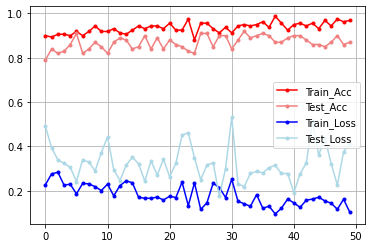

In [34]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker = '.', c='red', label='Train_Acc')
plt.plot(x_len, val_acc, marker = '.', c='lightcoral', label='Test_Acc')
plt.plot(x_len, loss, marker = '.', c='blue', label='Train_Loss')
plt.plot(x_len, val_loss, marker = '.', c='lightblue', label='Test_Loss')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# transform 학습

In [36]:
from tensorflow.keras.applications import VGG16

In [38]:
trans_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))   # include_top=> dense layer false로 뺄꺼야
trans_model.trainable=False
trans_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [39]:
finetune_model =  Sequential()
finetune_model.add(trans_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(32, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 15,241,186
Trainable params: 526,498
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

In [42]:
hist = finetune_model.fit(
                        train_generator,
                        epochs = 50, validation_data=test_generator, validation_steps=4)

Epoch 1/50
32/32 [==============================] - 2s 32ms/step - loss: 0.7185 - accuracy: 0.5250 - val_loss: 0.7918 - val_accuracy: 0.4000
Epoch 2/50
32/32 [==============================] - 1s 27ms/step - loss: 0.6283 - accuracy: 0.6750 - val_loss: 0.6401 - val_accuracy: 0.5500
Epoch 3/50
32/32 [==============================] - 1s 26ms/step - loss: 0.4697 - accuracy: 0.8000 - val_loss: 0.3547 - val_accuracy: 0.8500
Epoch 4/50
32/32 [==============================] - 1s 27ms/step - loss: 0.4228 - accuracy: 0.8062 - val_loss: 0.3432 - val_accuracy: 0.8500
Epoch 5/50
32/32 [==============================] - 1s 27ms/step - loss: 0.3161 - accuracy: 0.8750 - val_loss: 0.5860 - val_accuracy: 0.6500
Epoch 6/50
32/32 [==============================] - 1s 27ms/step - loss: 0.3095 - accuracy: 0.8938 - val_loss: 0.3942 - val_accuracy: 0.8500
Epoch 7/50
32/32 [==============================] - 1s 28ms/step - loss: 0.2267 - accuracy: 0.9250 - val_loss: 0.0838 - val_accuracy: 1.0000
Epoch 8/50
32

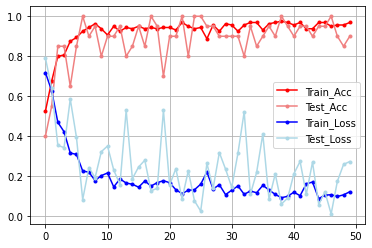

In [43]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker = '.', c='red', label='Train_Acc')
plt.plot(x_len, val_acc, marker = '.', c='lightcoral', label='Test_Acc')
plt.plot(x_len, loss, marker = '.', c='blue', label='Train_Loss')
plt.plot(x_len, val_loss, marker = '.', c='lightblue', label='Test_Loss')

plt.legend()
plt.grid()
plt.show()